In [15]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# generate data point
xs = np.random.random(size=100) * 10
ys = 3 * xs + 10
noise = np.random.normal(size=100, loc=0, scale=2)
noised_ys = ys + noise

# define model
with pm.Model() as linear_model:
    # priors
    b = pm.Normal('b', mu=0, sigma=10)
    w = pm.Normal('w', mu=0, sigma=10)
    # likelihood
    obs = pm.Normal('obs', mu=b + w * xs, sigma=2, observed=noised_ys)
    # sampling
    fit = pm.fit(n=50000) # use VI


Output()

Finished [100%]: Average Loss = 212.54


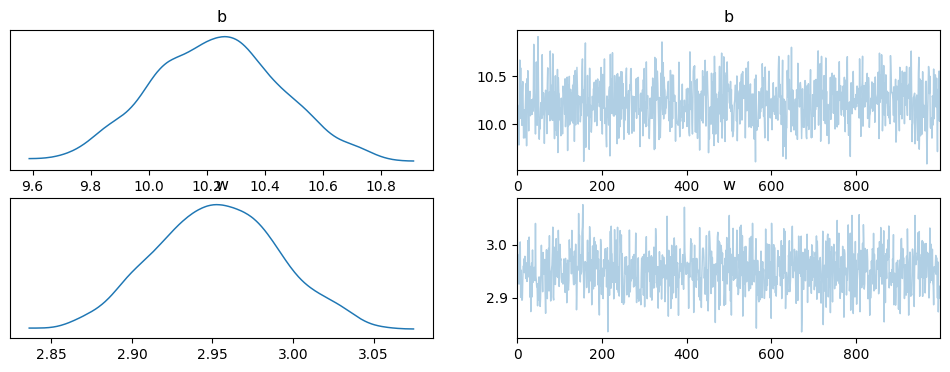

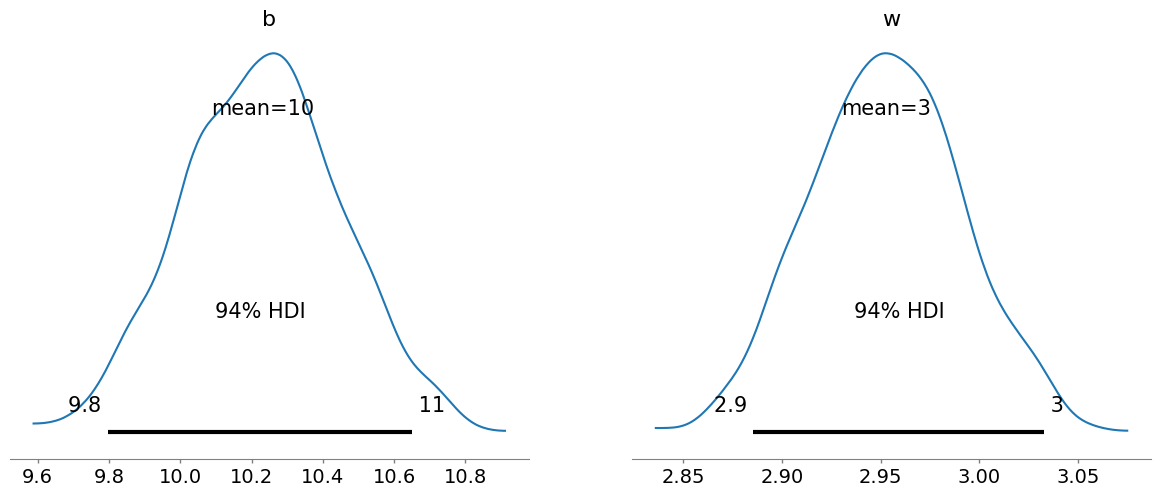

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
b  10.231  0.227   9.798   10.651      0.007    0.005    1100.0    1072.0   
w   2.953  0.039   2.886    3.033      0.001    0.001    1053.0    1022.0   

   r_hat  
b    NaN  
w    NaN  


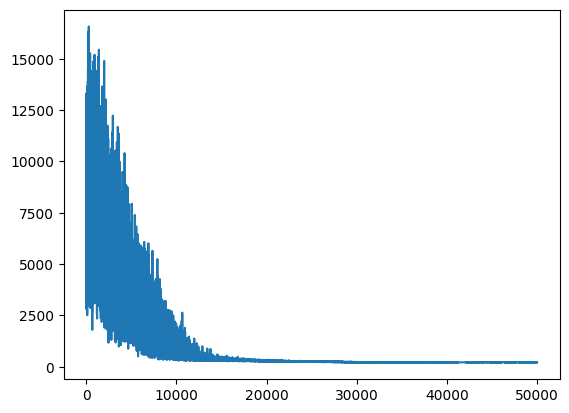

In [ ]:
# get samples from fit to draw
trace = fit.sample(1000)
# summarize
az.plot_trace(trace)
plt.show()
az.plot_posterior(trace)
plt.show()
print(az.summary(trace))

plt.plot(fit.hist)
plt.show()